<a href="https://colab.research.google.com/github/harshavardhangadila/Basic-Neural-Network-Using-Numpy-Keras-Pytorch-and-Jax/blob/main/10)_TensorFlow_Built_in_Layers_(Sequential_%2B_Dense).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TensorFlow Sequential API using Built-in Dense Layers

In [1]:
# Step 1: Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Step 2: Generate Synthetic 3-Variable Nonlinear Data
def generate_data(n_samples=1000):
    x1 = np.random.uniform(-4, 4, n_samples)
    x2 = np.random.uniform(-4, 4, n_samples)
    x3 = np.random.uniform(-4, 4, n_samples)
    y = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    y += np.random.normal(0, 0.2, n_samples)  # Add noise
    X = np.stack([x1, x2, x3], axis=1).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return X, y

X, y = generate_data()

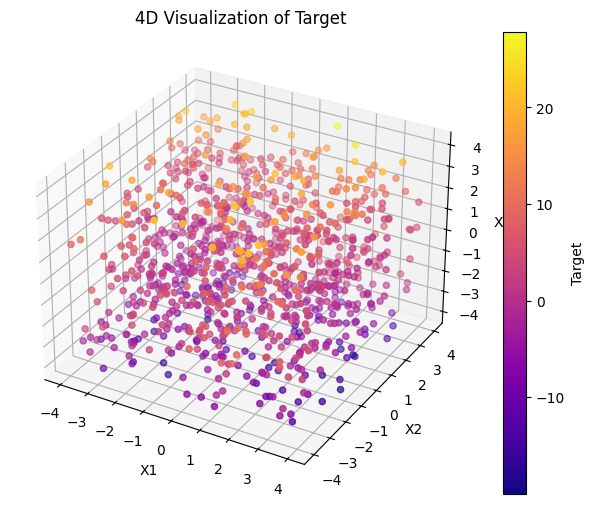

In [3]:
# Step 3: Visualize Training Data (4D)
def plot_4d(X, y, title="Target Visualization"):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y[:, 0], cmap='plasma')
    plt.colorbar(scatter, label="Target")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title(title)
    plt.show()

plot_4d(X, y, title="4D Visualization of Target")

In [4]:
# Step 4: Define 3-Layer Model using Sequential API + Built-in Layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [5]:
# Step 5: Compile and Train the Model
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

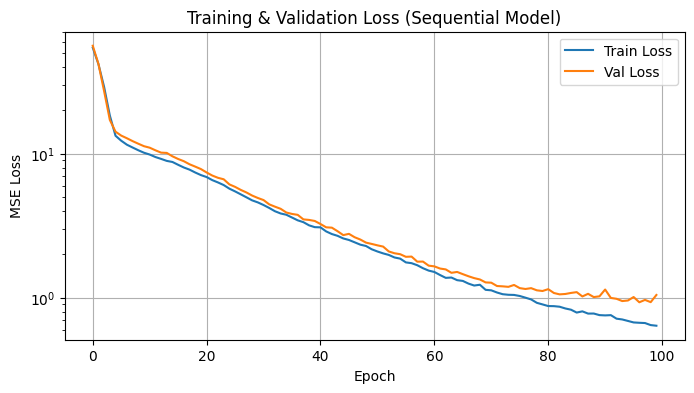

In [6]:
# Step 6: Plot Training and Validation Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss (Sequential Model)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Step 7: Evaluate Predictions
y_pred = model.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


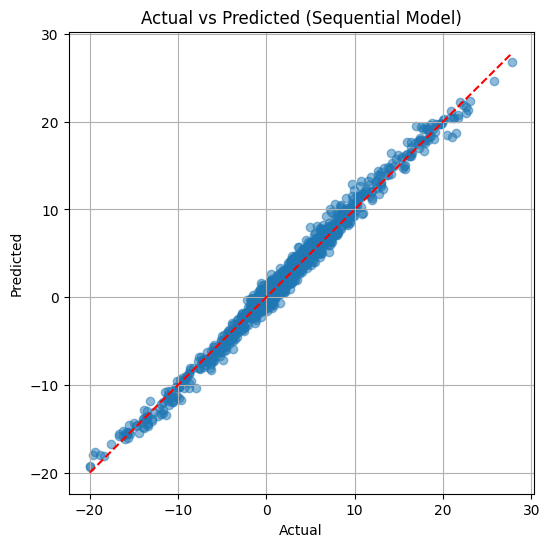

In [8]:
# Step 8: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Sequential Model)")
plt.grid(True)
plt.show()

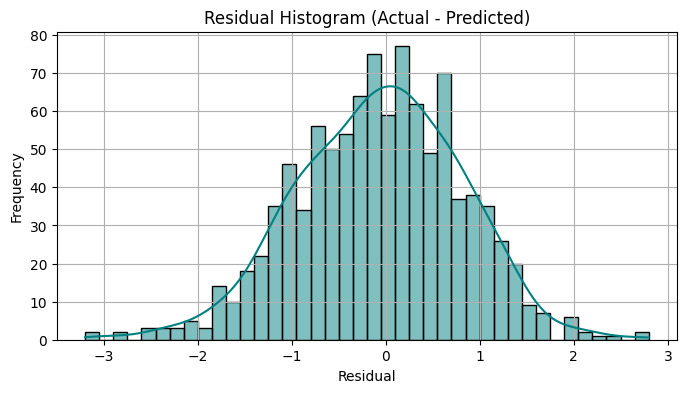

In [9]:
# Step 9: Residual Histogram
residuals = (y - y_pred).flatten()
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=40, kde=True, color='teal')
plt.title("Residual Histogram (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

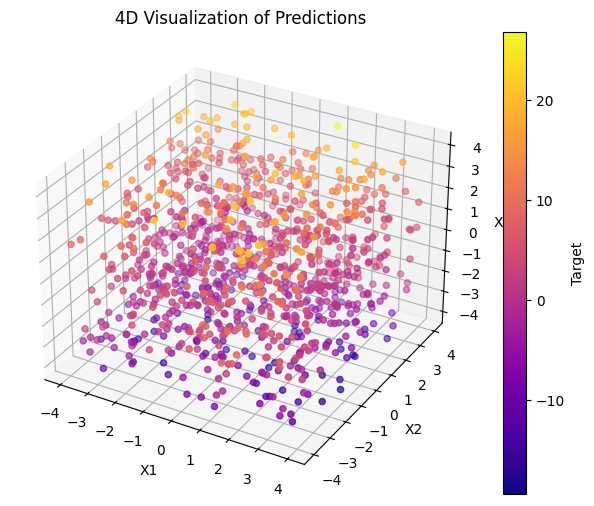

In [10]:
# Step 10: 4D Prediction Visualization
plot_4d(X, y_pred, title="4D Visualization of Predictions")

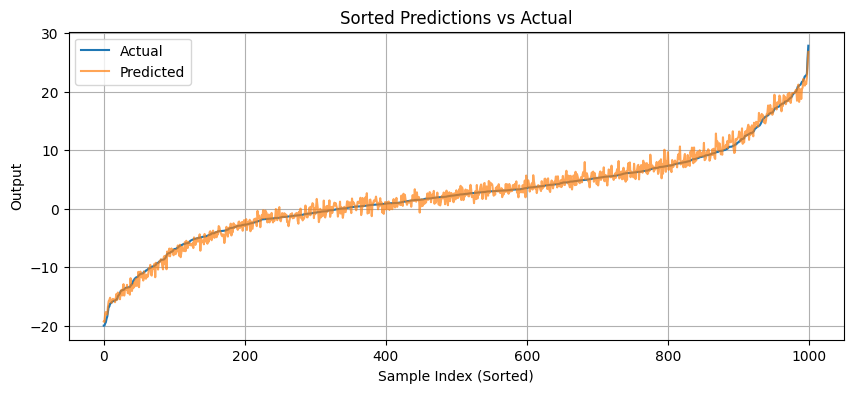

In [11]:
# Step 11: Sorted Predictions vs Actual
sorted_idx = np.argsort(y[:, 0])
plt.figure(figsize=(10, 4))
plt.plot(y[sorted_idx], label="Actual")
plt.plot(y_pred[sorted_idx], label="Predicted", alpha=0.7)
plt.title("Sorted Predictions vs Actual")
plt.xlabel("Sample Index (Sorted)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Step 12: Predict on Custom Inputs
def predict_custom(x1, x2, x3):
    sample = np.array([[x1, x2, x3]], dtype=np.float32)
    return model.predict(sample)[0][0]

test_points = [(-4, -4, -4), (0, 0, 0), (4, 4, 4)]
print("\nCustom Test Predictions:")
for x1, x2, x3 in test_points:
    pred = predict_custom(x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3}) → Prediction: {pred:.3f}, Actual: {actual:.3f}")


Custom Test Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Input: (-4, -4, -4) → Prediction: -8.658, Actual: -10.644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Input: (0, 0, 0) → Prediction: -0.631, Actual: 1.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Input: (4, 4, 4) → Prediction: 21.590, Actual: 24.729


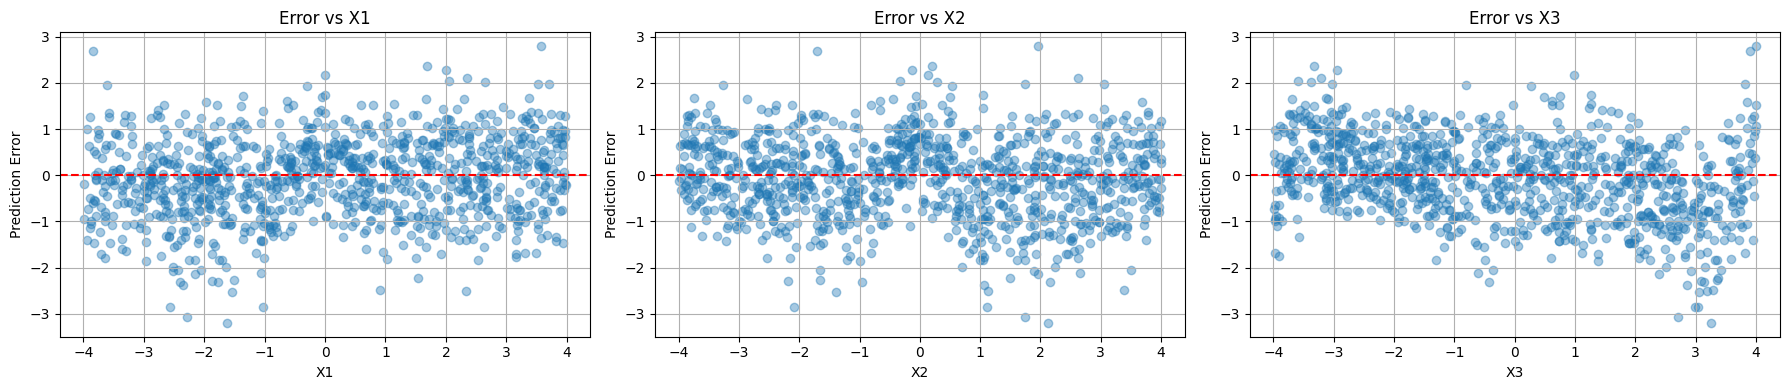

In [13]:
# Step 13: Plot Error vs Input Features
errors = (y - y_pred).flatten()

fig, axs = plt.subplots(1, 3, figsize=(18, 4))
feature_names = ['X1', 'X2', 'X3']
for i in range(3):
    axs[i].scatter(X[:, i], errors, alpha=0.4)
    axs[i].axhline(0, color='red', linestyle='--')
    axs[i].set_xlabel(feature_names[i])
    axs[i].set_ylabel("Prediction Error")
    axs[i].set_title(f"Error vs {feature_names[i]}")
    axs[i].grid(True)
plt.tight_layout()
plt.show()

<ipython-input-14-a03bea3fb967>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['X1', 'X2', 'X3'], y=avg_grad, palette='Set2')


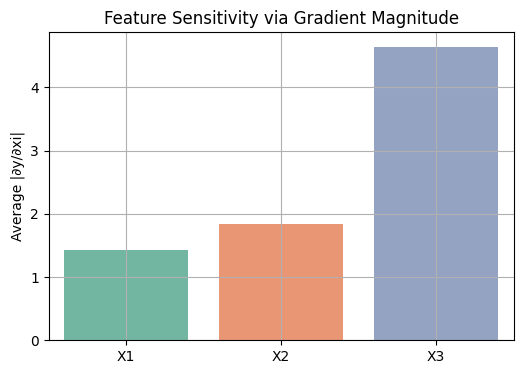

In [14]:
# Step 14: Feature Sensitivity via Gradient Analysis
X_tensor = tf.convert_to_tensor(X)
X_tensor = tf.Variable(X_tensor)  # Enable gradient tracking

with tf.GradientTape() as tape:
    y_output = model(X_tensor)
grads = tape.gradient(y_output, X_tensor).numpy()  # Shape: [n_samples, 3]

avg_grad = np.mean(np.abs(grads), axis=0)

plt.figure(figsize=(6, 4))
sns.barplot(x=['X1', 'X2', 'X3'], y=avg_grad, palette='Set2')
plt.title("Feature Sensitivity via Gradient Magnitude")
plt.ylabel("Average |∂y/∂xi|")
plt.grid(True)
plt.show()